# Logistic Regression using Neural Nets

**Data Preparation**
1. Figure out dimensions of x data 
2. Reshape into 1D arary
3. Normalize data

**Algorithm**
1. 


In [449]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

import seaborn as sns
sns.set()

In [450]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = 0, it's a 'non-cat' picture.


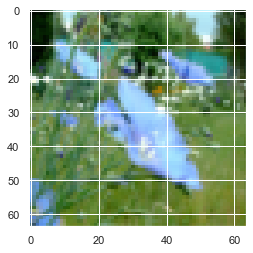

In [451]:
# Example of a picture
index =20
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

## Train and Test set data

- train_x and test_x are tensors `(m_train, num_pix, num_pix, 3)`
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape `(num_px, num_px, 3)` where 3 is for the 3 channels (RGB). Thus, each image is square `(height = num_px)` and `(width = num_px).`


In [452]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


## Flatten the x data and normalize 
- Convert the 3D image data into a 1D array. 
- Reshape `(num_pix, num_pix, 3)` into `(num_pix * num_pix * 3, 1)`
- Example: `(5,5,3)` to `(75,1)`

In [453]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


The pixel values vary (0,255), so mormalize by dividing all pixel values by 255

In [454]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## Building Algorithm
1. Define input feature functions
2. Initialize model parameters

###  Sigmoid Function

In [455]:
def sigmoid(z):
    ' Compute sigmoid of a scalar or numpy array and return'
    
    s = 1/(1+np.exp(-z))
    
    return s

### Initialize parameters
Initialize the weight vector `w` and bias `b`

In [456]:
def initialize_with_zeros(dim):
    'Initialize the weight vector w and bias value b'
    
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

In [457]:
# check 
initialize_with_zeros(2)

(array([[0.],
        [0.]]),
 0)

### Forward and back propagation

In [458]:
def propagate(w, b, X, Y):
    
    '''
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Calculated:
    z -- matrix of size (1, number of samples)
    A -- same size as z
    loss -- scalar, average of the sum of loss of all samples
    
    dw = dL/dw = dL/da * da/dz * dz/dw -- (dz/dw = x) 
    db = dL/db = dL/da * da/dz * dz/db -- (dz/db = 1)
        
    Return:
    loss -- average loss
    dw -- dL/dw
    db -- dL/db    
    
    '''
    
    # get number of training samples
    m = X.shape[1]
    
    '''Forward propogation to find the loss'''
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    cost = -1 / m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))  
    
    '''Backward propogation to find gradients'''
    dw = (1/m) * np.dot(X, (A-Y).T) 
    db = (1/m) * np.sum((A-Y)) 
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw, "db": db}
    
    
    
    return grads, cost
    

In [459]:
''''
checking with simple example
X is (2,3) => two features and three samples
Y is (1,3) => output for each of the three samples
w is (2,1) => two weights for two features of X
b is just a scalar

z = (w.T * X + b) would be (1,2)*(2,3) = (1,3) matrix.... which is z
A = sigmoid(z) would be (1,3) 
loss would just be a scalar value

'''

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])

z = np.dot(w.T, X) + b
A = sigmoid(z)

#propagate(w, b, X, Y)

#print("w \n", w)
#print("w.T \n", w.T)
#print("X \n ",X)
#print("w.T * X \n ", np.dot(w.T, X))
#print("Y \n ", Y)

grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


###  Optimization
Update the weights and biases using gradient descent

In [460]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    '''
    Optimze w and using Gradient Descent
    
    Arguments:
    w,b: Initial set of weights and bias 
    X,Y: Training X and Y
    num_iterations: for optimization loop
    learning_rate: how fast to descend
    print_cost: whether to print loss value at regular interval or not
    
    Calculate:
    propogate function called to get the gradients dw and db
    w,b - Updates these values based on the gradients
    
    Returns:
    Final w,b, dw, db, cost
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        # Get the gradients from this function
        grads, cost = propagate(w, b, X, Y)
                      
        dw = grads["dw"]
        db = grads["db"]
        
        # update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
                
        # Print the cost every 100 training iterations
        if i % 100 == 0: 
            costs.append(cost)
            
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
     
    params = {"w": w, "b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs
    

In [461]:
# check this code
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


### Predict test set
- We use the optimized values of `w` and `b` from the previous function to calculate the output of the test set.
- $A = \sigma(w^T X +b)$
- $Y_{prediction} = 0 (A < 0.5), 1 (A \geq 0.5) $

In [462]:
def predict(w, b, X):
    
    '''
    Predict labels 0/1 using the weights, bias, and test_X
    These weights and bias are from the trained model   
    
    '''
    
    # get size of test set and initialize Y_prediction array
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)  # don't think this is necessary
    
    
    # calculate z and then apply sigmoid
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[:, i] = (A[:, i] > 0.5) * 1
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [463]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


### Merge all functions together

In [464]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    '''
    Logistic Regression model that calls all previous functions
    '''
    
    # initialize the weights and bias with zeros
    # Number of features in X is passed as argument
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # apply gradient descent algorithm
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # get the optimzed values of w and b from params
    w = params["w"]
    b = params["b"]
    
    # predict on the train and test set
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    

In [465]:
from public_tests import *

model_test(model)

train accuracy: 85.71428571428572 %
test accuracy: 66.66666666666667 %
All tests passed!


In [466]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


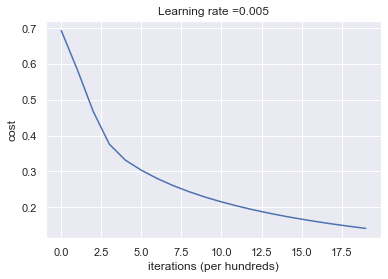

In [467]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

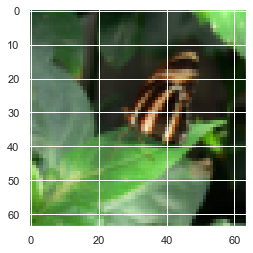

In [470]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0, index]].decode("utf-8") +  "\" picture.")